In [3]:
def skyline_draw(origin_database):
  result_1=skyline(origin_database)
  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  for rrr in result_1:
      plt.scatter(rrr[0],rrr[1],c="red") 

In [4]:
import numpy as np
from sys import getsizeof
import time
import copy
import matplotlib.pyplot as plt

def dominate (record1, record2):
  result0 = record1[0] - record2[0]
  result1 = record1[1] - record2[1]
  
  if result0<0 and result1<0:
    return 2
  if result0<0 and result1>0:
    return 0
  if result0<0 and result1==0:
    return 2
  if result0>0 and result1<0:
    return 0
  if result0>=0 and result1>=0:
    return 1
  if result0==0 and result1<0:
    return 2

In [2]:
def skyline(origin_database) :
    start_time = time.time()
    database = copy.copy(origin_database)
    #operating_setting = np.zeros.((database[0].att.shape),dtype='i2') ## 0 for min 1 for max 2 for distinct, basically for min
    w_size = 2
    count =1
    window = []
    temp = []
    skylines = []
    
    while database :
        #print('\n')
        #print(count,'번째 iteration')
        for record in list(database) :
            if not window :
                window.append(record)
                #print('append : window is ', window)
                database.remove(record)
                #print('remove from database is ', record)
                #print('window=',window)
                continue                
            record_dominated = False

            for target in list(window) :
               # print('\nthis turn record is ', record)
               # print('this turn target is ', target)
                if dominate(record, target) == 1 :
                   # print('d=1 : remove from database is ', record)
                    database.remove(record)
                    record_dominated = True
                    
                    break
                elif dominate(record, target) == 2 :
                    #print('d=2 : remove from window is ', target)
                    window.remove(target)
                    
                    continue
                elif dominate(record, target) == 0 :
                   # print('incomparable')
                    continue
            
            if record_dominated :
                continue
            if len(window) < w_size :               
                window.append(record)
               # print('append : window is ', window)
            else :
                
                temp.append(record)
               # print('append : temp is', temp)
            database.remove(record)            
        #print('count는 ',count)
        
        if count != 1 :
          for target in list(window):
           # print('실행할겡 ~!')
            for record_1 in list(skylines):
              
              if dominate(record_1, target) == 2:
                if len(window)!= 0 :
                  #print('지금 window는 : ', window)
                #  print('지금 target은 :', target)

                  window.remove(target)
                 # print('d=2 : remove from window by skylines is ,', target)
                  break
                  #if len(window)==0:
                    #break
              elif dominate(record_1, target) == 1:
                #print('sky에서 뺄게~!')
                skylines.remove(record_1)
        skylines = skylines + window
        #print('skyline : ', skylines)
        count += 1
        database = database + temp
        #print('database : ', database)
        temp.clear()
        #print('temp clear 후 database : ', database)
        window.clear()
    
    cost_time = time.time() - start_time
    #print('window: ',window)
    #('skylines : ',skylines)
   # print('database: ',database)
    return skylines

In [18]:
import random
origin_database=[]
num=16
for i in range(num):
  a=[random.uniform(10,50) for r in range(2)]
  c=[a[0],a[1]]
  origin_database.append(c)

In [ ]:
def Median(M):

  median_index=len(M)//2
  
  return median_index

In [ ]:
dimension=2
pivot =Median(origin_database)
M=np.array(origin_database)
origin_database

[[20, 11],
 [32, 15],
 [48, 38],
 [22, 18],
 [40, 41],
 [36, 18],
 [13, 27],
 [25, 22]]

In [ ]:
pivot= Median(M)
P1,P2 = Partition(M,dimension,pivot)

In [ ]:
P1,P2

(array([[20, 11],
        [32, 15],
        [22, 18],
        [36, 18]]), array([[25, 22],
        [13, 27],
        [48, 38],
        [40, 41]]))

In [ ]:
p11=list(Partition(P1,1,Median(P1))[0])

[array([20, 11]), array([22, 18])]

In [ ]:
p11=list(Partition(P1,1,Median(P1))[0])
p21=list(Partition(P1,1,Median(P1))[1])
p12=list(Partition(P2,1,Median(P2))[0])
p22list(Partition(P2,1,Median(P2))[1])

[array([32, 15]), array([36, 18])]

In [ ]:
p12=list(Partition(P2,1,Median(P2))[0])

[array([13, 27]), array([25, 22])]

In [ ]:
p22list(Partition(P2,1,Median(P2))[1])

[array([40, 41]), array([48, 38])]

In [6]:
def partion(origin_database):
  
  d1_sum=0
  d2_sum=0
  for i in range(len(origin_database)):
    d1_sum = d1_sum+origin_database[i][0]
    d1_average=d1_sum/len(origin_database)
    d2_sum = d2_sum+origin_database[i][1]
    d2_average=d2_sum/len(origin_database)
    

  p11=[]
  p21=[]
  p12=[]
  p22=[]
  for i in range(len(origin_database)):
    if origin_database[i][0]<d1_average and origin_database[i][1]<d2_average :
      p11.append(origin_database[i])
    elif origin_database[i][0]>d1_average and origin_database[i][1]>d2_average :
      p22.append(origin_database[i])  
    elif origin_database[i][0]>=d1_average and origin_database[i][1]<=d2_average :
      p21.append(origin_database[i])  
    elif origin_database[i][0]<=d1_average and origin_database[i][1]>=d2_average :
      p12.append(origin_database[i])  

  return p11,p21,p12,p22,d1_average,d2_average


In [ ]:
def partion2(origin_database):
  p11=[]
  p21=[]
  p12=[]
  p22=[]
  for i in range(len(origin_database)):
    if origin_database[i][0]<d1_average and origin_database[i][1]<d2_average :
      p11.append(origin_database[i])
    elif origin_database[i][0]>d1_average and origin_database[i][1]>d2_average :
      p22.append(origin_database[i])  
    elif origin_database[i][0]>=d1_average and origin_database[i][1]<=d2_average :
      p21.append(origin_database[i])  
    elif origin_database[i][0]<=d1_average and origin_database[i][1]>=d2_average :
      p12.append(origin_database[i])  

  return p11,p21,p12,p22,d1_average,d2_average

In [19]:
p11=partion(origin_database)[0]
p21=partion(origin_database)[1]
p12=partion(origin_database)[2]
p22=partion(origin_database)[3]
d1_average=partion(origin_database)[4]
d2_average=partion(origin_database)[5]


In [ ]:
p11=list(Partition(P1,1,Median(P1))[0])
p21=list(Partition(P1,1,Median(P1))[1])
p12=list(Partition(P2,1,Median(P2))[0])
p22=list(Partition(P2,1,Median(P2))[1])
pivot=Median(M)

In [20]:
def Merge(origin_database):
  skyline_draw(p11)
  skyline_draw(p21)
  skyline_draw(p12)
  skyline_draw(p22)

  x=[d1_average,d1_average]
  y=[10,50]

  plt.plot(x,y,c='black',linestyle='--')
  x=[10,50]
  y=[d2_average,d2_average]

  plt.plot(x,y,c='black',linestyle='--')
  plt.title("Skylines of the hotels",fontsize=15)
  plt.xlabel('Distance',fontsize=12)
  plt.ylabel('Price',fontsize=12)
  plt.savefig('/content/drive/My Drive/skyline operator1',dpi=300,transparent=True) 
  plt.show()

  s11=skyline(p11)
  s21=skyline(p21)
  s12=skyline(p12)
  s22=skyline(p22)
  temporary=[]
  for a11 in s11:
    for a21 in s21:
      if dominate(a21,a11)==1: #a11가 지배
        temporary.append(a21)

  s21= [x for x in s21 if x not in temporary]   
  R1=s11+s21

  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  for record in R1:
        plt.scatter(record[0],record[1],c="red")

  skyline_draw(p12)
  skyline_draw(p22)

  x=[d1_average,d1_average]
  y=[d2_average,50]

  plt.plot(x,y,c='black',linestyle='--')
  x=[10,50]
  y=[d2_average,d2_average]

  plt.plot(x,y,c='black',linestyle='--')
  plt.title("Skylines of the hotels",fontsize=15)
  plt.xlabel('Distance',fontsize=12)
  plt.ylabel('Price',fontsize=12)
  plt.savefig('/content/drive/My Drive/skyline operator2',dpi=300,transparent=True) 
  plt.show()

  #merging s12 and s22
  temporary=[]
  for a12 in s12:
    for a22 in s22:
      if dominate(a22,a12)==1: #a2가 지배
        temporary.append(a22)
  s22= [x for x in s22 if x not in temporary]    
  R2=s12+s22

  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  for record2 in R2:
        plt.scatter(record2[0],record2[1],c="red")
  for record1 in R1:
        plt.scatter(record1[0],record1[1],c="red")
  x=[10,50]
  y=[d2_average,d2_average]

  plt.plot(x,y,c='black',linestyle='--')
  plt.title("Skylines of the hotels",fontsize=15)
  plt.xlabel('Distance',fontsize=12)
  plt.ylabel('Price',fontsize=12)
  plt.savefig('/content/drive/My Drive/skyline operator3',dpi=300,transparent=True) 
  plt.show()

  #merging s11 and R2
  temporary_r2=[]
  temporary_s11=[]

  for a11 in s11:
    for a2 in R2:
      if dominate(a2,a11)==1: #a2가 지배
        temporary_r2.append(a2)
      elif dominate(a11,a2)==2:
        temporary_s11.append(a11)  
  R2= [x for x in R2 if x not in temporary_r2]
  s11= [x for x in s11 if x not in temporary_s11]
      
  R3=s11+R2

  R=R1+R3

  new_R = []
  for v in R:
      if v not in new_R:
          new_R.append(v)

  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  for record2 in new_R:
        plt.scatter(record2[0],record2[1],c="red")
  
  plt.title("Skylines of the hotels",fontsize=15)
  plt.xlabel('Distance',fontsize=12)
  plt.ylabel('Price',fontsize=12)
  plt.savefig('/content/drive/My Drive/skyline operator4',dpi=300,transparent=True) 

  plt.show()
  
  for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  
  plt.title("Skylines of the hotels",fontsize=15)
  plt.xlabel('Distance',fontsize=12)
  plt.ylabel('Price',fontsize=12)
  plt.savefig('/content/drive/My Drive/skyline operator4',dpi=300,transparent=True) 

  plt.show()
  return new_R,R1,R2,R3



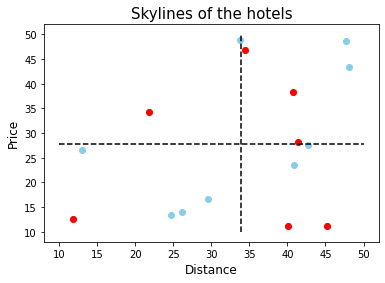

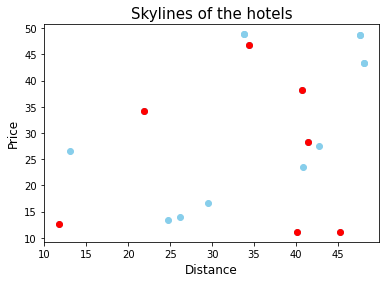

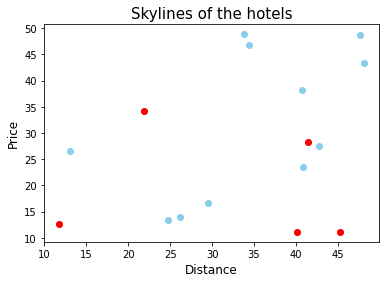

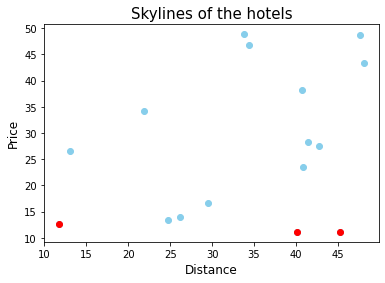

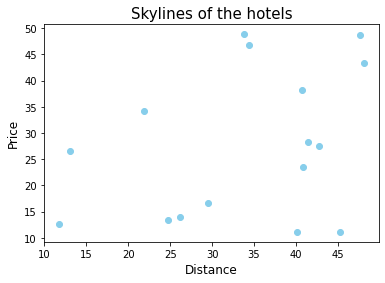

([[11.759301652167924, 12.634830633450829],
  [45.260961029410716, 11.114551160132194],
  [40.12107282847363, 11.158341231641389]],
 [[11.759301652167924, 12.634830633450829],
  [45.260961029410716, 11.114551160132194],
  [40.12107282847363, 11.158341231641389]],
 [],
 [[11.759301652167924, 12.634830633450829]])

In [21]:
Merge(origin_database)

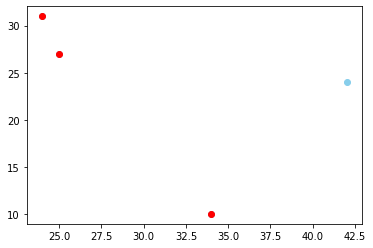

In [ ]:
#그냥 스카이라인 구하기
skyline_draw(origin_database)

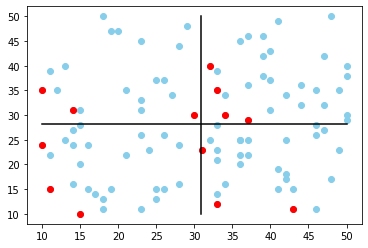

In [ ]:
skyline_draw(p11)
skyline_draw(p21)
skyline_draw(p12)
skyline_draw(p22)

x=[d1_average,d1_average]
y=[10,50]

plt.plot(x,y,c='black')
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')

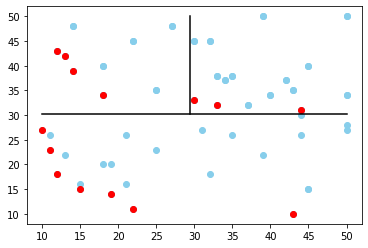

In [ ]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record1 in R1:
      plt.scatter(record1[0],record1[1],c="red")

skyline_draw(p12)
skyline_draw(p22)

x=[d1_average,d1_average]
y=[d2_average,50]

plt.plot(x,y,c='black')
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')

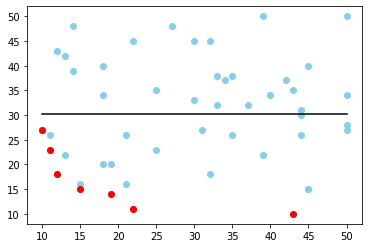

In [ ]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record2 in R2:
      plt.scatter(record2[0],record2[1],c="red")
for record1 in R1:
      plt.scatter(record1[0],record1[1],c="red")
x=[10,50]
y=[d2_average,d2_average]

plt.plot(x,y,c='black')

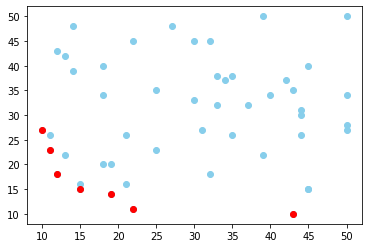

In [ ]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
for record2 in new_R:
      plt.scatter(record2[0],record2[1],c="red")
plt.show()

In [ ]:
import random
origin_database=[]
num=8
for i in range(num):
  a=[random.uniform(10,50) for r in range(2)]
  c=[a[0],a[1]]
  origin_database.append(c)

In [ ]:

def Partition(M,dimension,pivot):
  # 0-th dim, 1-th dim
  M=M[np.argsort(M[:,dimension-1])]
  P1= M[:pivot]
  P2= M[pivot:]
  #print("P1",P1)
  #print("P2",P2)
  return P1,P2

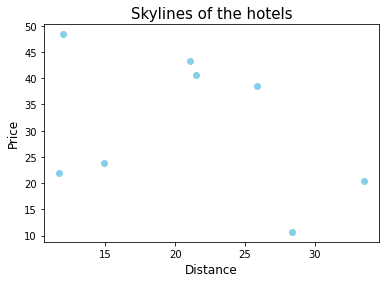

In [ ]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  
plt.title("Skylines of the hotels",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12)
#plt.savefig('/content/drive/My Drive/skyline operator4',dpi=300,transparent=True) 

plt.show()

In [ ]:

  x=[d1_average,d1_average]
  y=[10,50]

  plt.plot(x,y,c='black',linestyle='--')
  x=[10,50]
  y=[d2_average,d2_average]

  plt.plot(x,y,c='black',linestyle='--')

TypeError: ignored

In [ ]:
for record in origin_database:
      plt.scatter(record[0],record[1],c="skyblue")
  
plt.title("Skylines of the hotels",fontsize=15)
plt.xlabel('Distance',fontsize=12)
plt.ylabel('Price',fontsize=12)
#plt.savefig('/content/drive/My Drive/skyline operator4',dpi=300,transparent=True) 

plt.show()